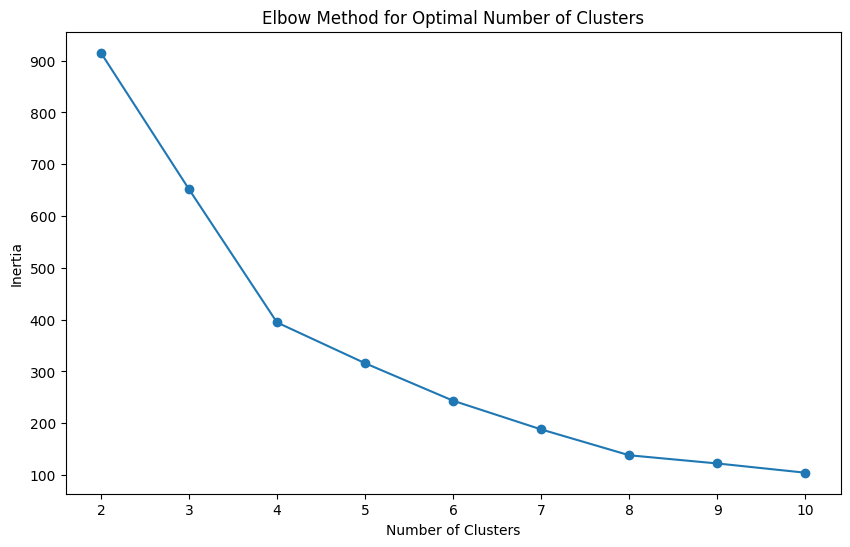

In [5]:
# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_profile_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Davies-Bouldin Index: 0.5828154100698719


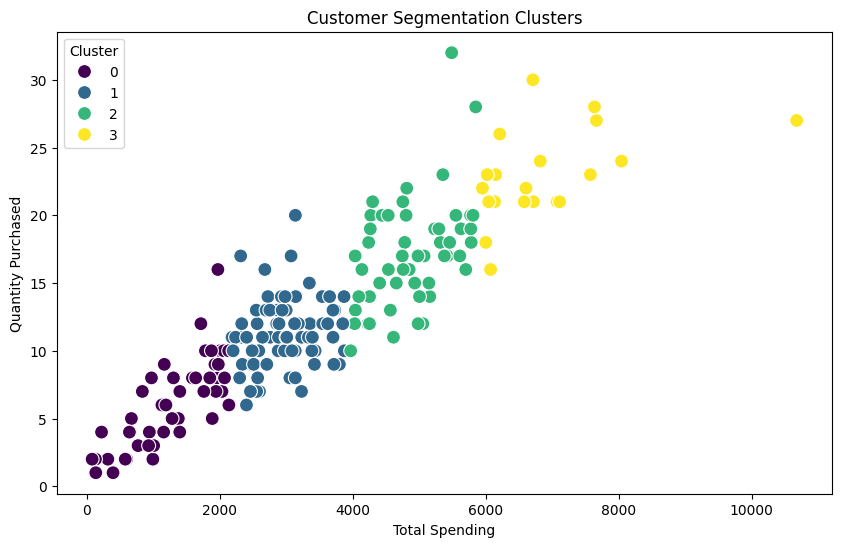

Customer segmentation completed and saved to 'Shreesha_Bhat_Clustering.csv'.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge data to create customer profiles
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Create customer profiles
profiles = merged_data.groupby(['CustomerID', 'Region']).agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum'     # Total items purchased
}).reset_index()

# One-hot encode 'Region'
profiles = pd.get_dummies(profiles, columns=['Region'])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
profiles['Cluster'] = kmeans.fit_predict(profiles[['TotalValue', 'Quantity']])

# Reorder clusters by mean TotalValue
cluster_means = profiles.groupby('Cluster')['TotalValue'].mean().sort_values()
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_means.index)}
profiles['Cluster'] = profiles['Cluster'].map(cluster_mapping)

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(profiles[['TotalValue', 'Quantity']], profiles['Cluster'])
print(f"Davies-Bouldin Index: {db_score}")

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=profiles['TotalValue'],
    y=profiles['Quantity'],
    hue=profiles['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Spending')
plt.ylabel('Quantity Purchased')
plt.legend(title='Cluster')
plt.show()

# Save results
profiles.to_csv('Shreesha_Bhat_Clustering.csv', index=False)
print("Customer segmentation completed and saved to 'Shreesha_Bhat_Clustering.csv'.")